# COVID-19 Time Series Prediction using ARIMA model (As of June 05)

### Data Collection

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

### Total Confirmed Cases

In [2]:
url1="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed=pd.read_csv(url1)
country="India"
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


### Total Death Cases

In [3]:
url2="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_deaths=pd.read_csv(url2)
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,300,309,327,357,369,384,405,426,446,451
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,34,34,34,34,34,35,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,681,690,698,707,715,724,732,741,751,760
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,6


### Total Recovered Cases

In [4]:
url3="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_recovered=pd.read_csv(url3)
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,898,910,925,938,945,960,980,1001,1034,1039
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,741,741,744,751,757,759,780,781,781
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,21,24,24,38,38,40,41,42,61


### EDA

In [5]:
import datetime
import matplotlib.dates as mdates

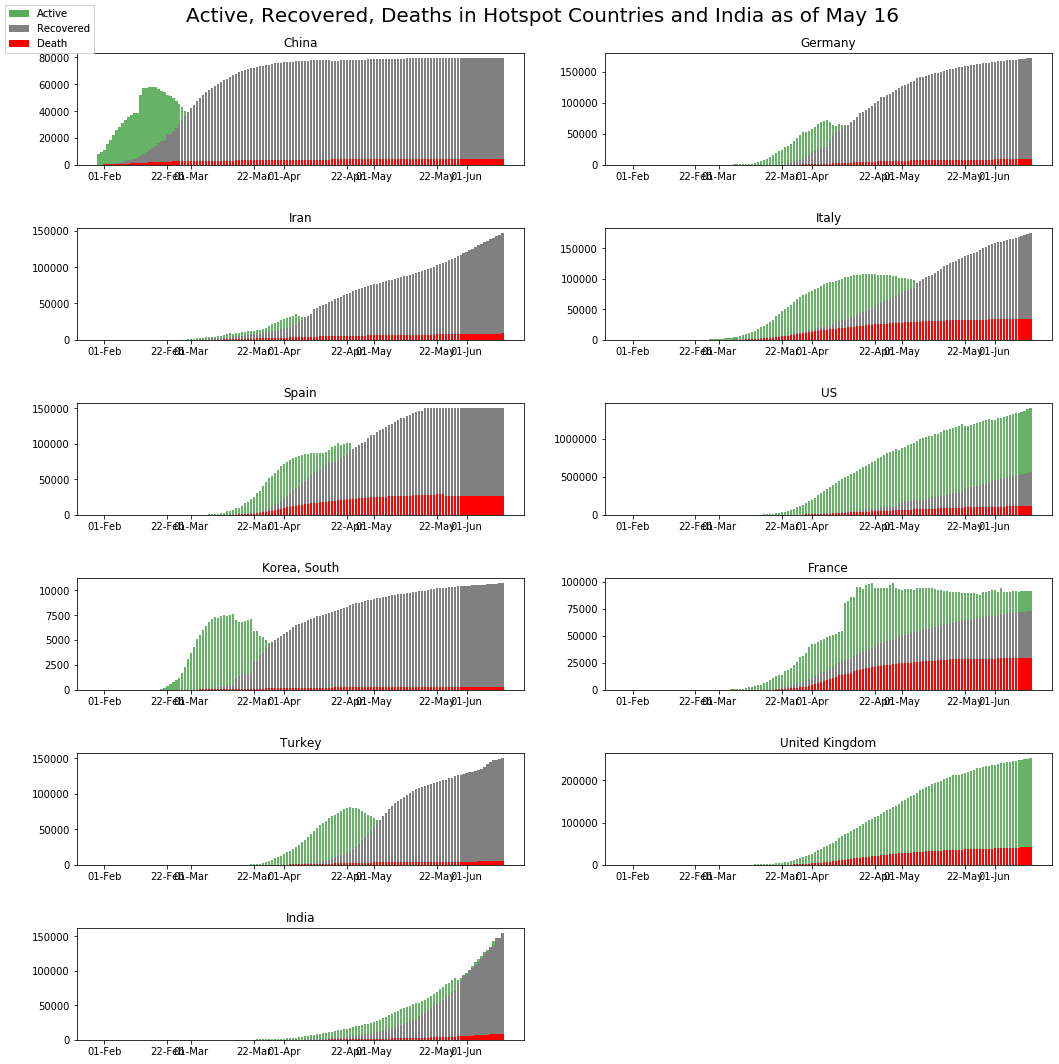

In [6]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(df_confirmed.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = df_confirmed.groupby('Country/Region').sum().reset_index()
df2 = df_deaths.groupby('Country/Region').sum().reset_index()
df3 = df_recovered.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
for country in hotspots:
    k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
    global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,15))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of May 16',fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [7]:
dates = list(df_confirmed.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

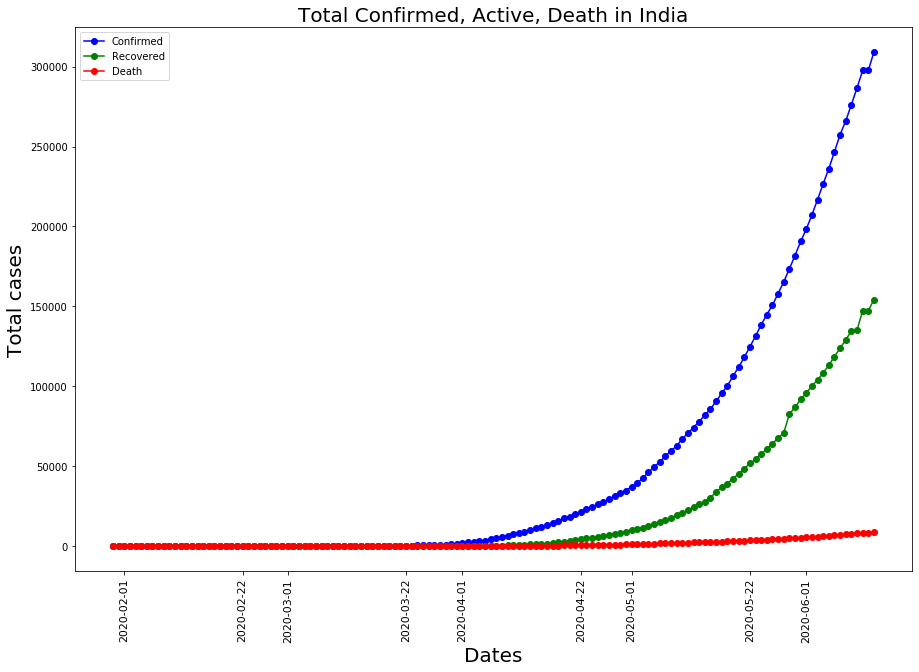

In [8]:
df1 = df_confirmed.groupby('Country/Region').sum().reset_index()
df2 = df_deaths.groupby('Country/Region').sum().reset_index()
df3 = df_recovered.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();


### Calculating Growth Factor

In [9]:
k =df1[df1['Country/Region']=='India'].loc[:,'2/4/20':]
india_confirmed = k.values.tolist()[0] 

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.1175642722171957


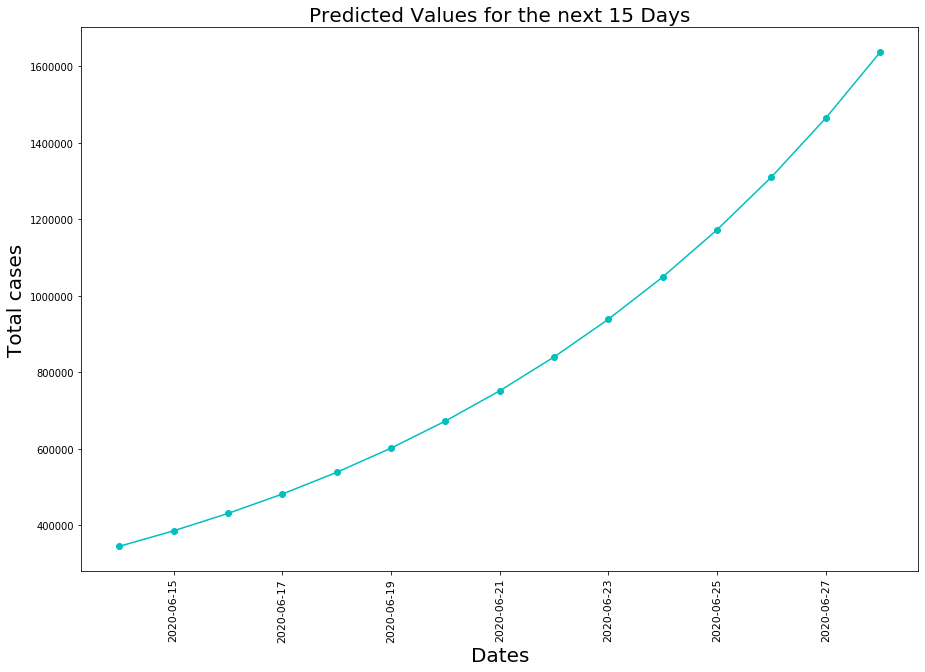

In [10]:
prediction_dates = []

start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed['India'][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

In [11]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

### Model Generation and Model Fitting

E:\Anaconda\envs\PythonCPU\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\envs\PythonCPU\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


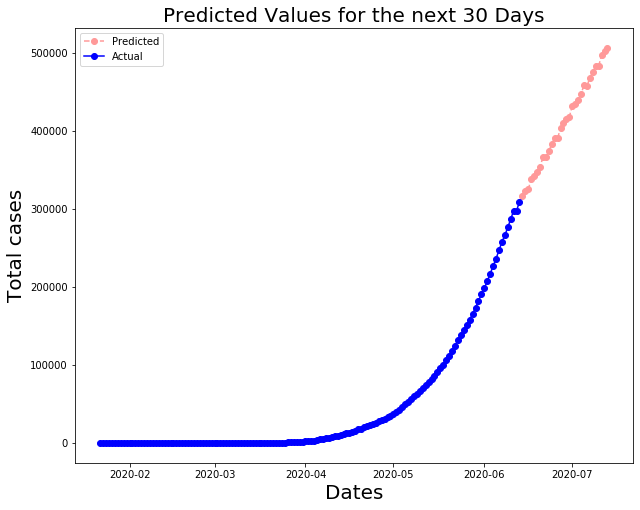

In [12]:
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (10,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 30 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [18]:
pred_res=[]
for i in pred:
    i=int(i)
    pred_res.append(i)

In [21]:
arima = ARIMA(data['y'][:-5], order=(5, 1, 0)) 
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred1 = list(forecast[0])

start_date1 = data['ds'].iloc[-6]
prediction_dates1 = []
for i in range(30):
    date1 = start_date1 + datetime.timedelta(days=1)
    prediction_dates1.append(date1)
    start_date1 = date1

In [22]:
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  138
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1028.493
Method:                       css-mle   S.D. of innovations            409.531
Date:                Sun, 14 Jun 2020   AIC                           2070.985
Time:                        15:06:14   BIC                           2091.476
Sample:                             1   HQIC                          2079.312
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3967.4330   3771.223      1.052      0.293   -3424.029    1.14e+04
ar.L1.D.y      0.5324      0.093      5.746      0.000       0.351       0.714
ar.L2.D.y      0.3724      0.110      3.387      0.0

In [31]:
arima.save('arima.pkl')

### Time Series Prediction

In [23]:
pred_res=[]
for i in pred1:
    i=int(i)
    pred_res.append(i)

In [24]:
confirmed_dates=pd.DataFrame()
confirmed_dates['Date']=data['ds']
confirmed_dates.tail()

,Date
139,2020-06-09
140,2020-06-10
141,2020-06-11
142,2020-06-12
143,2020-06-13


In [25]:
pred_dates=pd.DataFrame()
pred_dates['Date']=prediction_dates
pred_dates.head()

,Date
0,2020-06-14
1,2020-06-15
2,2020-06-16
3,2020-06-17
4,2020-06-18


In [26]:
cc=[]
for a in data['y'].iloc[-5:]:
    cc.append(a)
for b in ['NA','NA','NA','NA','NA']:
    cc.append(b)

In [27]:
dates=[]
for i in confirmed_dates['Date'][-5:]:
    dates.append(i)
for j in pred_dates['Date'][:5]:
    dates.append(j)

### Model Performance Evaluation

In [28]:
#Mean Absolute Percentage error(MAPE)
MAPE = np.mean(np.abs(np.array(cc[:5]) - np.array(pred_res[:5]))/np.array(cc[:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.970154908898998 %


# PREDICTED RESULTS

In [29]:
month_pred=pd.DataFrame()
month_pred['Predicted Cases for 30 days']=pred_res
month_pred

,Predicted Cases for 30 days
0,275599
1,285236
2,294190
3,303215
4,312521
5,321473
6,330402
7,339445
8,348382
9,357247


In [30]:
r=pd.DataFrame()
r['Date']=dates
r['Confirmed Cases']=cc
r['Predicted Cases']=pred_res[:10]
r['Model Accuracy in %'] = str(float(1-MAPE)*100)[:5]
r

,Date,Confirmed Cases,Predicted Cases,Model Accuracy in %
0,2020-06-09,276146,275599,99.02
1,2020-06-10,286605,285236,99.02
2,2020-06-11,297535,294190,99.02
3,2020-06-12,297535,303215,99.02
4,2020-06-13,308993,312521,99.02
5,2020-06-14,NA,321473,99.02
6,2020-06-15,NA,330402,99.02
7,2020-06-16,NA,339445,99.02
8,2020-06-17,NA,348382,99.02
9,2020-06-18,NA,357247,99.02


## Note: ARIMA is not able to take any external factors into account. The data points are only extrapolated based on historical data. If there are bans of going out imposed overnight in a state, our model will not provide good forecasts.